In [149]:
#1. Introduction

#S: Bellabeat is a scale-up that manufactures smart products designed to monitor activity, stress, sleep, and reproductive data to help women better understand how their bodies work and make healthier choices. 
#C: Unknown how to unlock to the growth opporunities
#Q: How do customers use non-Bellabeat devices?
    #1. What are the patterns identified?
    #2. How could these patterns apply to Bellabeat customers?
    #3. How could these patterns help influence Bellabeat marketing strategy?

In [150]:
#2. Prepare
import pandas as pd

dailyActivity = pd.read_csv('Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv') 
dailyCalories = pd.read_csv('Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv') 
dailyIntensities = pd.read_csv('Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv') 
sleepDay = pd.read_csv('Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv') 

hourlyCalories = pd.read_csv('Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv') 
hourlyIntensities = pd.read_csv('Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv') 
hourlySteps = pd.read_csv('Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv') 

minuteCaloriesNarrow = pd.read_csv('Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv') 
minuteCaloriesWide = pd.read_csv('Fitabase Data 4.12.16-5.12.16/minuteCaloriesWide_merged.csv') 
minuteIntensitiesNarrow = pd.read_csv('Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv') 
minuteIntensitiesWide = pd.read_csv('Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv') 
minuteMETsNarrow = pd.read_csv('Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv') 
minuteSleep = pd.read_csv('Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv') 
minuteStepsNarrow = pd.read_csv('Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv') 
minuteStepsWide = pd.read_csv('Fitabase Data 4.12.16-5.12.16/minuteStepsWide_merged.csv') 
heartrate_seconds = pd.read_csv('Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv') 

weightLogInfo = pd.read_csv('Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv') 


In [151]:
dailyActivity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [152]:
dailyActivity.info()
#sleepDay.info()

#Dates are in object

In [153]:
print(dailyActivity.Id.nunique())
print(sleepDay.Id.nunique())
print(weightLogInfo.Id.nunique()) 

# Only 30 persons, so 3 has probably done double 
# Weigth has not enough info, not representative and could lead to bias

33
24
8


In [154]:
print(dailyActivity.duplicated().value_counts())
print(sleepDay.duplicated().value_counts())

#Sleep data has 3 dublicates

False    940
dtype: int64
False    410
True       3
dtype: int64


In [167]:
import numpy as np

df = dailyActivity

numeric_cols = df.select_dtypes(include=[np.number]).columns
has_negative_values = (df[numeric_cols] < 0).any().any()

if has_negative_values:
    print("The DataFrame contains negative values.")
else:
    print("The DataFrame does not contain negative values.")

#No negative values

The DataFrame does not contain negative values.


In [53]:
## 3. Clean and manage data

In [158]:
sleepDay = sleepDay.drop_duplicates()

In [159]:
dailyActivity['weekday'] = dailyActivity['ActivityDate'].astype('datetime64').dt.day_name()
sleepDay['weekday'] = sleepDay['SleepDay'].astype('datetime64').dt.day_name()

In [160]:
dailyActivity["TotalActiveHours"] = (dailyActivity["VeryActiveMinutes"] +	dailyActivity["FairlyActiveMinutes"]+ dailyActivity["LightlyActiveMinutes"]+ dailyActivity["SedentaryMinutes"])/60

In [161]:
sleepDay['Awake'] = sleepDay['TotalTimeInBed'] - sleepDay['TotalMinutesAsleep']

In [183]:
dailyActivity['StepBand'] = pd.qcut(dailyActivity['TotalSteps'], 3, precision=0, labels=["Low", "Medium", "High"])
dailyActivity[['StepBand', 'Calories', 'TotalActiveHours']].groupby(['StepBand'], as_index=False).mean().sort_values(by='StepBand', ascending=True)

,StepBand,Calories,TotalActiveHours
0,Low,1816.015924,20.438217
1,Medium,2345.910543,20.477742
2,High,2750.460064,20.021299


In [195]:
dailyActivity['DistanceBand'] = pd.qcut(dailyActivity['TotalDistance'], 3, precision=0, labels=["Low", "Medium", "High"])
dailyActivity[['DistanceBand', 'Calories', 'TotalActiveHours']].groupby(['DistanceBand'], as_index=False).mean().sort_values(by='DistanceBand', ascending=True)

,DistanceBand,Calories,TotalActiveHours
0,Low,1801.633758,20.522081
1,Medium,2297.273885,20.230945
2,High,2815.179487,20.183814


In [184]:
dailyActivity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,weekday,TotalActiveHours,StepBand
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,Tuesday,18.233333,High
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,Wednesday,17.216667,High
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,Thursday,24.000000,High
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,Friday,16.633333,Medium
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,Saturday,17.333333,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,Sunday,24.000000,High
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,Monday,24.000000,High
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,Tuesday,24.000000,High
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,Wednesday,24.000000,High


In [185]:
## 4. Analyze

dailyActivity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveHours
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,20.312553
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,4.432196
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,16.495833
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,24.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,24.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,24.000000


In [186]:
data_v1 = dailyActivity.groupby('weekday', as_index = False)['TotalSteps'].agg('mean')
data_v2 = dailyActivity.groupby('weekday', as_index = False)['TotalDistance'].agg('mean')
data_v3 = dailyActivity.groupby('weekday', as_index = False)['Calories'].agg('mean')
data_v4 = dailyActivity.groupby('weekday', as_index = False)['TotalActiveHours'].agg('mean')
data_v5 = dailyActivity.groupby('weekday', as_index = False)['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes'].agg('mean')
data_v6 = sleepDay.groupby('weekday', as_index = False)['TotalMinutesAsleep', 'TotalTimeInBed', 'Awake' ].agg('mean')
data_v7 = dailyActivity.groupby('weekday', as_index = False)['Id'].agg('count')

C:\Users\louis\AppData\Local\Temp\ipykernel_13900\3505602178.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_v5 = dailyActivity.groupby('weekday', as_index = False)['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes'].agg('mean')
C:\Users\louis\AppData\Local\Temp\ipykernel_13900\3505602178.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_v6 = sleepDay.groupby('weekday', as_index = False)['TotalMinutesAsleep', 'TotalTimeInBed', 'Awake' ].agg('mean')


In [187]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

data_v1['weekday'] = pd.Categorical(data_v1['weekday'], categories=day_order, ordered=True)
data_v2['weekday'] = pd.Categorical(data_v2['weekday'], categories=day_order, ordered=True)
data_v3['weekday'] = pd.Categorical(data_v3['weekday'], categories=day_order, ordered=True)
data_v4['weekday'] = pd.Categorical(data_v4['weekday'], categories=day_order, ordered=True)
data_v5['weekday'] = pd.Categorical(data_v5['weekday'], categories=day_order, ordered=True)
data_v6['weekday'] = pd.Categorical(data_v6['weekday'], categories=day_order, ordered=True)
data_v7['weekday'] = pd.Categorical(data_v7['weekday'], categories=day_order, ordered=True)

In [188]:
## 5. Vizualize
import matplotlib.pyplot as plt
import seaborn as sns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


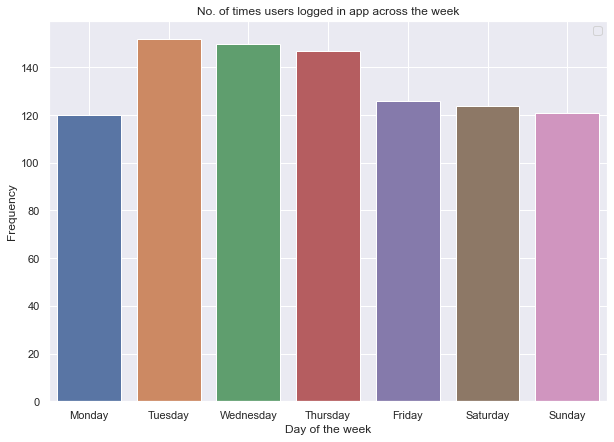

In [189]:
fig = plt.figure(figsize =(10, 7))
sns.barplot(x='weekday', y='Id', data=data_v7)
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week")
plt.grid(True)
plt.legend(title='')
plt.savefig('Average Total steps on Day of Week.png', dpi=300)
plt.show()

#Users track from Tuesday until Thursday

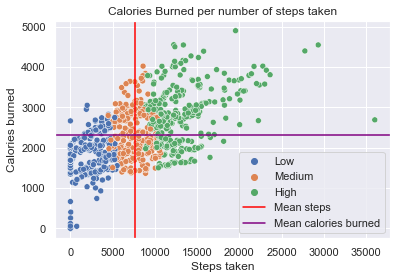

In [196]:
sns.scatterplot(data=dailyActivity, x='TotalSteps', y='Calories', hue="DistanceBand")
mean_calories = 2303
mean_steps = 7637
plt.axvline(mean_steps, color = "Red", label = "Mean steps")
plt.axhline(mean_calories, color = "Purple", label = "Mean calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories Burned per number of steps taken")
plt.grid(True)
plt.legend()
plt.show()

# Positive correlation steps taken and distance band.
# Positive correlaion between activity and calories.
# Calories burn rate cooling down from 15,000 steps onwards.

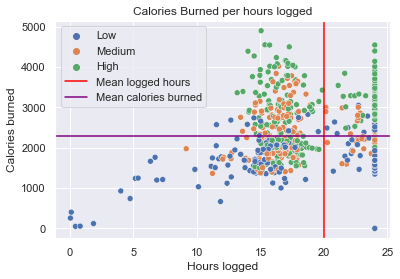

In [197]:
sns.scatterplot(data=dailyActivity, x='TotalActiveHours', y='Calories', hue = 'DistanceBand')
mean_calories = 2303
mean_loggedhours = 20
plt.axvline(mean_loggedhours, color = "Red", label = "Mean logged hours")
plt.axhline(mean_calories, color = "Purple", label = "Mean calories burned")
plt.xlabel("Hours logged")
plt.ylabel("Calories burned")
plt.title("Calories Burned per hours logged")
plt.grid(True)
plt.legend()
plt.show()

#No positive correlation: more hours logged does not correlate to more calories or steps taken/ distance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


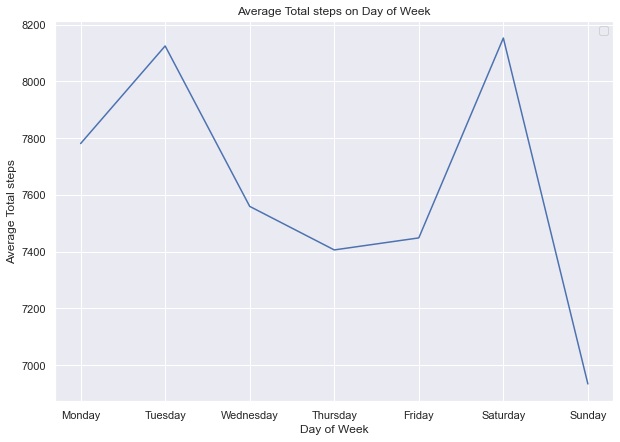

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


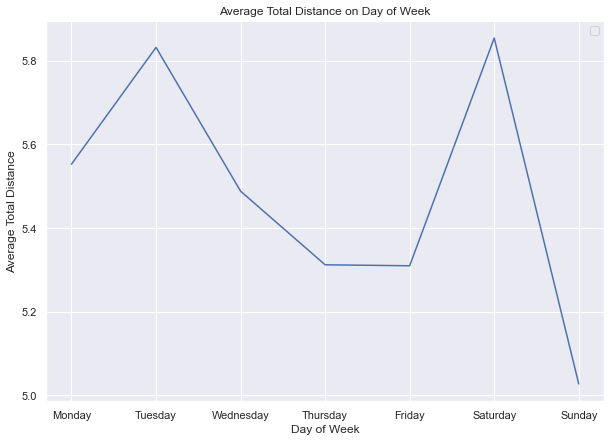

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


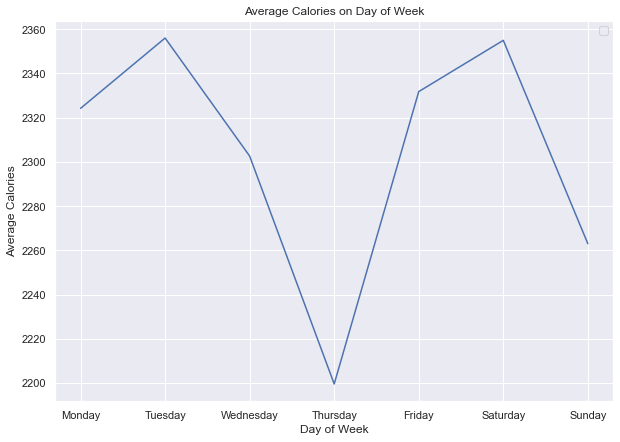

In [198]:
fig = plt.figure(figsize =(10, 7))
sns.lineplot(x='weekday', y='TotalSteps', data=data_v1)
plt.title("Average Total steps on Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Total steps")
plt.legend(title='')
plt.savefig('Average Total steps on Day of Week.png', dpi=300)
plt.show()

fig = plt.figure(figsize =(10, 7))
sns.lineplot(x='weekday', y='TotalDistance', data=data_v2)
plt.title("Average Total Distance on Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Total Distance")
plt.legend(title='')
plt.savefig('Average Total Distance on Day of Week.png', dpi=300)
plt.show()

fig = plt.figure(figsize =(10, 7))
sns.lineplot(x='weekday', y='Calories', data=data_v3)
plt.title("Average Calories on Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Calories")
plt.legend(title='')
plt.savefig('Average Calories on Day of Week.png', dpi=300)
plt.show()

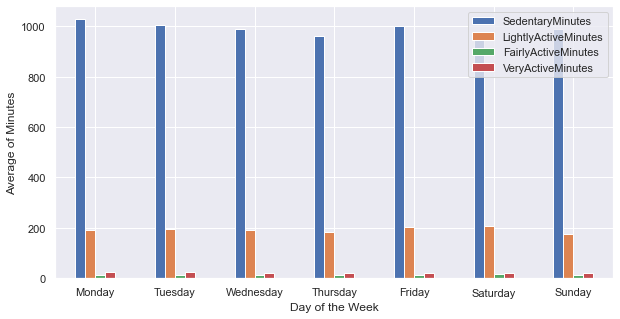

In [211]:
data_v5_reordered = data_v5.set_index('weekday').loc[day_order].reset_index()

data_v5_reordered.plot.bar(x='weekday', xlabel='Day of the Week', ylabel='Average of Minutes', rot=0, figsize=(10,5))
plt.show()

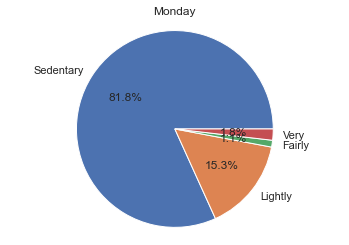

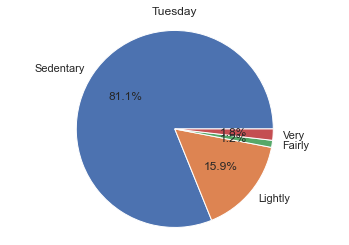

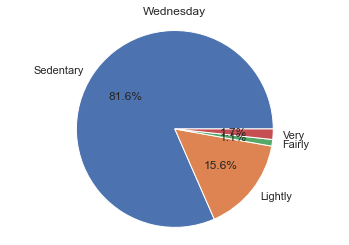

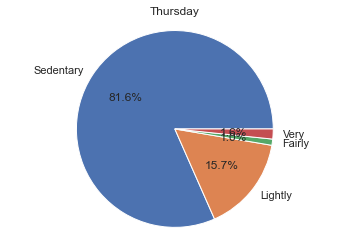

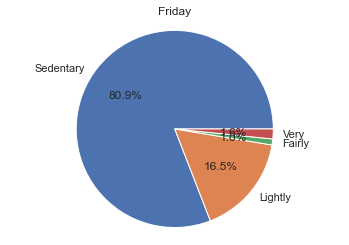

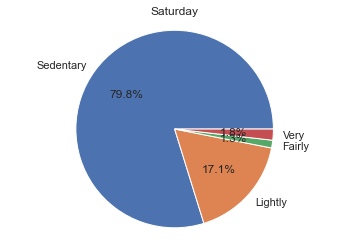

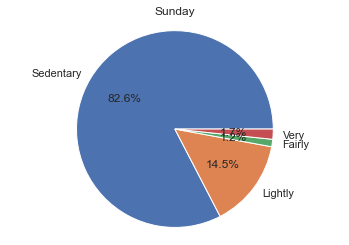

In [240]:
for _, row in data_v5_reordered.iterrows():
    day = row['weekday'] 
    data = row.drop('weekday')

    plt.figure()  # Create a new figure for each day
    plt.title(day)  # Set the title as the day of the week
    labels = ["Sedentary", "Lightly", "Fairly", "Very"]  # Use column names as labels
    plt.pie(data.values, labels=labels, autopct = "%1.1f%%")  # Create the pie chart with the values
    plt.axis('equal')  # Set equal aspect ratio to make it a circle

plt.show()

#Sedentary minutes takes the largest slice at 81.3%. This indicates that users are using the FitBit app to log daily activities.
#App is rarely being used to track fitness (ie. running) as per the minor percentage of fairly active activity (1.1%) and very active activity (1.7%). 
#This is highly discouraging as FitBit app was developed to encourage fitness.

In [ ]:
## 6. Conclustions and recommendations

Conclusions:
    # Calories and activity (number of steps and distance) are positively correlated
    # Majority of users (81.3%) are using the FitBit app to track sedentary activities and not using it for tracking their health habits.
    # Users prefer to track their activities during weekdays (Tuesday, Wednesday, Thursday)

Recommendations:
    # Personalized notifications to promote activity: Daily 10.000 steps, how much left. Especially on weekends!
    # Calorie counter: easy-to-use interface that displays number of calories burned to improve motivation and set a certain goal
    # Not logged activity distance
    # Smart scales, because it is missing data
    # Weekly, monthly reports: achievements
    # Meditation: By tracking the time of day when the user decreases their activity levels, their rest days, or perhaps around bedtime, the app could send notifications to the person’s phone or smart device and suggest different meditation or relaxation techniques.


Next steps:
- Look per hour